In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objects as go
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-x2t1s4jn because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, enable=True) 

In [3]:
def loadCompileModel(model_dir: str):
    model = keras.models.load_model(model_dir)
    return model

In [4]:
def loadTestData(directory: str):
    data_generator = ImageDataGenerator(rescale=1./255)    
    test_data = data_generator.flow_from_directory(
        directory,
        target_size=(96,96),
        color_mode='grayscale',
        classes=['human-false', 'human-true'],
        class_mode='binary',
        batch_size=128,
        seed=19980603
    )
    return test_data

In [5]:
def testModel(folder: str):
    metrics_map = {}
    
    model_name = folder.split('/')[-1]
    if model_name != 'ZoonosisData':
        model_name = model_name.strip('ZoonosisData')
    model = loadCompileModel(folder)
    test = loadTestData(os.path.join(folder, 'test'))
    
    predictions = model.predict(test)
    _, accuracy, _, _ = model.evaluate(test)
    
    precision, recall, _ = precision_recall_curve(test.classes, predictions)
    FP, TP, _ = roc_curve(test.classes, predictions)
    auc = roc_auc_score
    f1 = f1_score
    mcc = matthews_corrcoef
    cm = confusion_matrix
    
    metrics_map = {
        'name':model_name,
        'Accuracy':accuracy,
        'f1_score':f1,
        'AUC':auc,
        'MCC':mcc,
        'PR_curve':(precision, recall),
        'ROC_curve':(FP, TP),
        'Conf_Matrix':cm,
    }
    
    return metrics_map

In [6]:
def plot_PR_curve(name, precision, recall, f1):
    plt.plot(recall, precision, label='%s Precision Recall (f1 score = %0.2f)' % ('Zoonosis Model', f1))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title(f'{name} Model Precision Recall Curve')
    plt.legend()

In [34]:
def plot_ROC_curve(name, FP, TP, auc, mcc):
    plt.plot(FP, TP, label='%s ROC curve (AUC = %0.2f, MCC = %.3f)' % ('Zoonosis Model', f1, mcc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive')
    plt.ylabel('True positive')
    plt.title(f'{name} Model Receiver operating characteristic Curve')
    plt.legend(loc=(0, -.38))

In [8]:
test_dirs = ['../data/MetazoaZoonosisData/', '../data/ZoonosisData/',
             '../data/RNA-MetazoaZoonosisData/', '../data/DNA-MetazoaZoonosisData/',
             '../data/Plant-HumanZoonosisData/', '../data/NonEukaryote-HumanData/']

In [9]:
model = loadCompileModel('Model')

In [14]:
predictions = (model.predict(test_data_iterator, verbose=1) > 0.5).astype("int32").reshape(-1)

496/496 [==============================] - 19s 38ms/step


In [23]:
# test = loadTestData(os.path.join('../data/ZoonosisData/', 'test'))

predictions = (model.predict(test, verbose=1) > 0.5).astype("int32")#.reshape(-1)
# _, accuracy, _, _ = model.evaluate(test)

precision, recall, _ = precision_recall_curve(test.classes, predictions)
FP, TP, _ = roc_curve(test.classes, predictions)
f1 = f1_score(test.classes, predictions)
mcc = matthews_corrcoef(test.classes, predictions)
cm = confusion_matrix(test.classes, predictions)

496/496 [==============================] - 19s 38ms/step


In [24]:
f1

0.8796235715886175

In [25]:
mcc

0.004698924438417591

In [26]:
cm

array([[  960,  6745],
       [ 6686, 49072]])

In [27]:
auc = roc_auc_score(test.classes, predictions)

In [28]:
auc

0.5023416875266037

In [29]:
accuracy

0.9950364828109741

In [21]:
sns.set_theme(style="darkgrid")
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

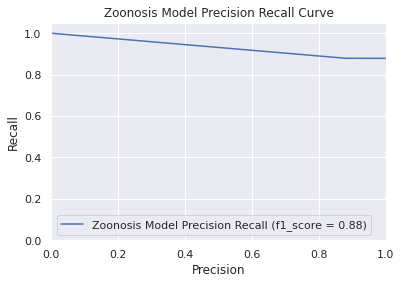

In [22]:
plot_PR_curve('Zoonosis', precision, recall, f1)

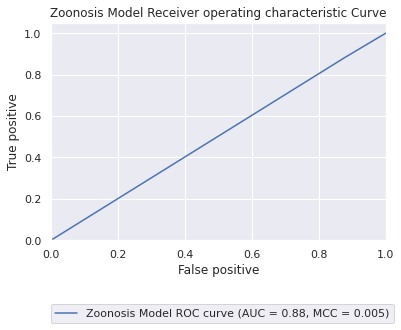

In [35]:
plot_ROC_curve('Zoonosis', FP, TP, auc, mcc)